# 딥러닝 이론

## AI, ML, DL 정의

딥러닝은 인공지능의 한 분야

AI < ML < DL
- Artificial Intelligence (AI): 인간의 지능을 모방하는 모든 기술
- Machine Learning (ML): 명시적인 규칙을 프로그래밍하지 않고 데이터로부터 패턴을 학습하는 기법 (예: SVM, Random Forest)
- Deep Learning (DL): 머신러닝의 하위 분야, 인공신경망(Artificial Neural Network)을 기반으로 하는 학습 방법

## 비슷한거?

회귀 분석의 확장판

- 기존 회귀 분석: $y = ax + b$ (데이터를 가장 잘 표현하는 직선 찾기)  
- 딥러닝: $y = f(x)$
  - 입력($x$): 설계 변수, 센서 데이터, 이미지, 시계열 파형 등
  - 출력($y$): 성능 지표, 고장 유무, 다음 시간의 상태 등
  - 함수($f$): 내부가 수많은 파라미터로 이루어진 거대한 비선형 함수

데이터만으로 입력과 출력 사이의 매핑 관계를 찾아내는 도구

## ML vs DL

딥러닝은 데이터만 잘 넣어주면 신경망이 알아서 뭔가를 함

---

# 파이썬 찍먹

매트랩 안에도 신경망 툴박스가 있지만 파이썬으로 할거임

**왜냐면**:
- 딥러닝 라이브러리 생태계가 파이썬 중심임
- 모델 구조, 손실 함수, 학습 루프를 직접 만질 수 있어서 자유도가 높음
- 레퍼런스가 훠어어얼씬 많음
- 못생기고 불편하고 다크모드도 안 되는 매트랩 편집기 안 써도 됨
- 오픈소스라 돈 안듦
- 서버 구축해두고 노트북으로 접속해서 작업하기 좋음

이번 시간에는 구글 colab으로 해보겠음


## Numpy

수학 계산용 라이브러리  
매트랩이랑 비슷한 느낌?

In [1]:
import numpy as np

# 행렬 만들때는 np.array 사용
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

print(f"A = ", A)
print(f"B = ", B)
print(f"size(A): A.shape =",A.shape)
print(f"A * B: A @ B =", A @ B)
print(f"A .* B: A * B =", A * B)

A =  [[1 2]
 [3 4]]
B =  [[5 6]
 [7 8]]
size(A): A.shape = (2, 2)
A * B: A @ B = [[19 22]
 [43 50]]
A .* B: A * B = [[ 5 12]
 [21 32]]


In [2]:
import numpy as np

C = np.random.randint(low=0, high=9,size=[1,9,1])
print(f"C =", C)
print("\n")
print(f"size(C) =",C.shape)
print("\n")

C = [[[8]
  [6]
  [1]
  [3]
  [3]
  [1]
  [1]
  [4]
  [8]]]


size(C) = (1, 9, 1)




In [3]:
import numpy as np
C = np.random.randint(low=0, high=9,size=[1,9,1])

# 값 인덱스가 0부터 시작함
print(f"C(1,1,1): C[0,0,0] =",C[0,0,0])

# 범위 슬라이싱 할때 끝 인덱스는 포함 안됨
print(f"C(:,2:4,:): C[:,1:4], shape =",C[:,1:4].shape)

# end 대신 음수 인덱싱 사용
print(f"C(:,end,:) = C[:,-1,:]",C[:,-1,:])
print(f"C(:,end-2,:) = C[:,-3,:]",C[:,-3,:])

# 스텝 슬라이싱
print(f"하나 건너서 선택: C[:,0::2] =", C[:,0::2])
print(f"세개 건너서 선택: C[:,0::4] =", C[:,0::4])

# Boolean Mask Indexing
mask = C > 5
C[mask]

# 그외에도...
# det(A) = np.linalg.det(A)

C(1,1,1): C[0,0,0] = 1
C(:,2:4,:): C[:,1:4], shape = (1, 3, 1)
C(:,end,:) = C[:,-1,:] [[3]]
C(:,end-2,:) = C[:,-3,:] [[2]]
하나 건너서 선택: C[:,0::2] = [[[1]
  [1]
  [0]
  [2]
  [3]]]
세개 건너서 선택: C[:,0::4] = [[[1]
  [0]
  [3]]]


array([], dtype=int64)

## Matplotlib

시각화 라이브러리

특징:
- 그림 크기랑 해상도가 내가 정한대로 딱 나옴
  - MATLAB에서 그림 뽑으면 보이는거랑 실제랑 다를때가 있었음
  - 저널 포맷에 맞춰서 그림 크기, 폰트 등 설정해놓고 그림 뽑으면 편함

보통 matplotlib.pyplot 모듈을 plt로 임포트함

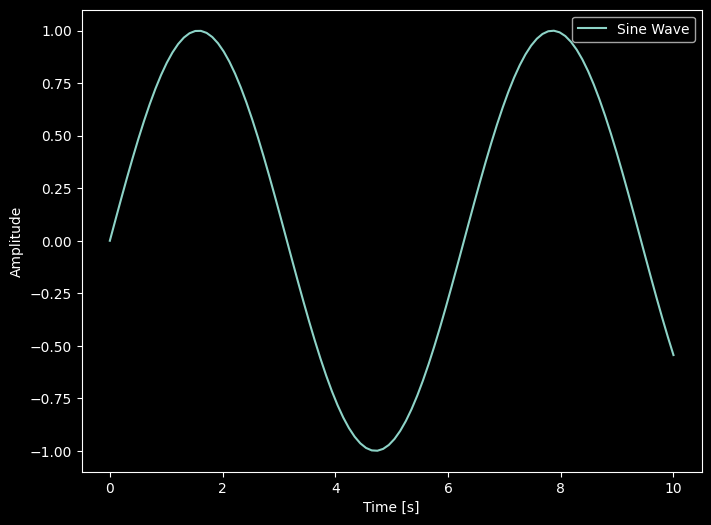

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 다크모드가 된다!
plt.style.use('dark_background')
# plt.style.use('default')

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(8,6)) # 그림 사이즈 지정 가능
plt.plot(x, y, label='Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

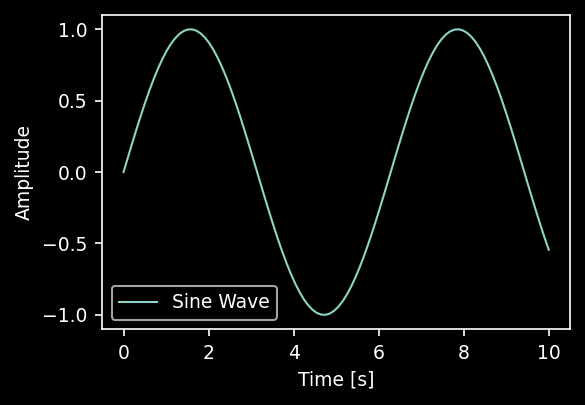

In [5]:
import matplotlib.pyplot as plt

# # plot 기본값 설정할 수 있음
# plt.rcParams.update({
#     "figure.figsize": (4,2.8), # figure size (inch)
#     "font.size": 10, # 기본 폰트 사이즈
#     "axes.labelsize": 9,
#     "axes.titlesize": 9,
#     "legend.fontsize": 9,
#     "xtick.labelsize": 9,
#     "ytick.labelsize": 9,
#     "lines.linewidth": 1.6, # 선 두께
#     "figure.dpi": 300, # plot 해상도
# })

# plot 기본값 설정하는 함수 예시
# adj_font: 폰트 사이즈 조절 (기본값 = 0)
# a_lw: 선 두께 (기본값 = 1.0)
def default_plt_params(adj_font = 0.0, a_lw = 1.0):
    plt.rcParams.update({
        "figure.figsize": (4,2.8), # figure size (inch)
        "font.size": 10+adj_font, # 기본 폰트 사이즈 + 조절량
        "axes.labelsize": 9+adj_font,
        "axes.titlesize": 9+adj_font,
        "legend.fontsize": 9+adj_font,
        "xtick.labelsize": 9+adj_font,
        "ytick.labelsize": 9+adj_font,
        "lines.linewidth": a_lw, # 선 두께
        "figure.dpi": 150,
        "savefig.dpi": 2300, # 저장 해상도
    })

default_plt_params() # adj_font, a_lw 기본값 설정해놔서 인자 안넣어놔도 실행 가능

plt.plot(x, y, label='Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.savefig(f"test.png")

---
다시 딥러닝으로 돌아와서

# 퍼셉트론 (Perceptron)
신경망의 가장 작은 구성요소, 뉴런을 수학적으로 모델링한 무언가.  
입력의 선형 결합 후 활성화 함수를 통과시킨 값을 출력.

<img src="image/2026-01-09-14-15-25.png" width="600"/>

수식으로 표현하면,
$$y = f(\mathbf{w}^T\mathbf{x} + b).$$
- 입력($\mathbf{x}$): 센서 데이터, 설계 변수 등 모델에 들어가는 정보.
- 가중치($\mathbf{w}$, Weights): 입력 신호의 중요도(강도)를 조절.
- 편향($b$, Bias): 활성화 함수가 작동하는 기준점을 이동시킴. 입력이 모두 0이어도 출력에 영향을 줄 수 있음. 선형 함수의 $y$절편에 해당.
  - 결정 경계를 원점에서 벗어날 수 있게 해줌 = bias가 없으면 원점 기준으로만 분류 가능.
- 활성화 함수($f$, Activation function): 가중합이 일정 수준을 넘었을 때 어떤 신호를 보낼지 결정.

## 기하학적 의미
2차원 공간에서 하나의 퍼셉트론은 직선 하나(고차원 공간에서는 초평면)를 긋는 것과 같음.    
$\mathbf{w}^\top \mathbf{x} + b = 0$ 로 표현되는 직선(결정 경계)을 기준으로 두 값을 분류.


## 퍼셉트론의 한계
직선 하나로 나눌 수 있는 문제만 해결할 수 있음.  

<img src="image/2026-01-14-09-36-44.png" width="600"/>

[Source](https://m.blog.naver.com/qbxlvnf11/221860706494)

XOR 문제는 어떤 직선을 그어도 0과 1을 한번에 나눌 수 없음.  

# Single Layer Perceptron (SLP)

<img src="image/2026-01-14-09-37-26.png" width="600"/>

**입력층**과 **출력층**만으로 구성된 가장 단순한 신경망 구조  
Layer: 같은 높이(?)에 있는 뉴런들을 모아놓은거  

<img src="image/2026-01-12-14-12-30.png" width="600"/>

SLP = 많은 퍼셉트론 = 많은 직선의 나열 -> 여전히 비선형 문제는 풀 수 업다.

# Multi Layer Perceptron (MLP)

<img src="image/2026-01-12-14-25-04.png" width="540"/>

2차원 평면을 3차원 공간으로 들어올리면(Lifting) XOR을 풀 수 있을 것 같은데?  

##### **입력층 > 은닉층(Hidden Layer) > 출력층 구조의 MLP 도입**

<img src="image/2026-01-09-14-16-18.png" width="400"/>

근데 단순히 층을 쌓기만 하면 결국 선형 변형임 ($y = W_2(W_1x)$).  
##### **층 사이에 비선형 활성화 함수를 끼워 넣어서 공간을 뒤틀어야 함**

## 작동 원리
- Lifting: 은닉층이 입력층의 데이터를 더 높은 차원의 특징(Feature) 공간으로 매핑함. 2차원에서는 얽혀 있던 데이터들을 3차원 이상의 공간으로 들어 올려 분리될 여지를 만듦.
- 비선형 왜곡 (Non-linear mapping): 활성화 함수가 고차원 공간을 뒤틀고 접음. 이 과정을 통해 **직선(초평면) 하나로 분리 가능한 상태**로 데이터를 재배치.
- 출력층: 왜곡된 공간 위에 직선을 그어 데이터 분류. 

<img src="image/2026-01-12-17-20-36.png" width="540"/>

##### > 은닉층은 데이터를 분류하기 좋게 입력 공간을 변형(Lifting & Bending)하고, 출력층은 그 위에서 단순한 선형 분리를 수행.

---

# 경사하강법
[**3B1B: Gradient descent, how neural networks learn**](https://www.youtube.com/watch?v=IHZwWFHWa-w)

<img src="image/2026-01-13-10-41-04.png"/>

**함수값**이 최소가 되는 **입력값**을 찾기 위해 현재 위치에서 **가장 가파른 경사**를 따라 내려가기  

## 기울기
<img src="image/2026-01-13-10-49-00.png" width="720"/>

- 함수의 특정 지점에서 기울기 = 어느 방향으로 이동해야 함수값이 가장 빠르게 증가하는지.
- 음의 기울기(Negative gradient) 방향으로 이동하면 함수값이 가장 빠르게 감소

## 예시 신경망 구조
<img src="image/2026-01-14-09-43-10.png"/>

28*28 픽셀 이미지 = 784 (입력) -> 16 (은닉층 1) -> 16 (은닉층 2) -> 10 (출력), Fully connected

파라미터 수 계산  
- 가중치: 이전 레이어 차원 * 현재 레이어 차원
- 편향: 현재 레이어 차원
1. 입력 -> 은닉층 1 = 784 * 16 (가중치) + 16 (편향) = 12560
2. 은닉층 1 -> 은닉층 2 = 16 * 16 (가중치) + 16 (편향) = 272
3. 은닉층 2 -> 출력 = 16 * 10 (가중치) + 10 (편향) = 170

총 파라미터 수 = 12560 + 272 + 170 = 13002

## Loss / Cost Function
<img src="image/2026-01-13-11-12-33.png"/>

### Loss function
<img src="image/2026-01-14-09-51-51.png"/>

- 단일 데이터 포인트에 대해 예측이 얼마나 틀렸는지.
- 손실 함수의 값이 낮을수록 모델의 예측이 실제 값에 가까워진다는 것을 의미.
- <img src="image/2026-01-13-11-19-11.png"/>

### Cost function
<img src="image/2026-01-13-11-12-54.png"/>

- 의미: 전체 훈련 데이터셋에 대한 모델의 평균적인 성능.
  - Loss의 평균
- 입력: 신경망의 모든 가중치와 편향.
- 출력: 신경망의 성능을 나타내는 스칼라.

---

# 신경망 학습
목표: **Cost**(함수값)가 최소가 되는 **가중치, 편향**(입력값)을 찾기.
방법: 경사하강법 사용
$$w_{new} = w_{old} - \eta \cdot \nabla C$$

현재 위치($w_{old}$)에서 경사($\nabla C$)를 타고 조금씩($\eta$) 이동하여 더 좋은 위치($w_{new}$)로 간다.

$\nabla C$를 어떻게 계산함?

## 학습 사이클
### Step 1. Forward Propagation

<img src="image/2026-01-14-09-48-54.png"/>

- 방향: 입력층 $\rightarrow$ 은닉층 $\rightarrow$ 출력층  
- 내용: 현재의 가중치와 편향을 사용하여 입력 데이터에 대한 예측값($\hat{y}$)을 계산.  

### Step 2. Loss 계산
- 내용: 예측값($\hat{y}$)과 실제 정답($y$)의 차이를 계산하여 **Cost**를 구함.

#### 인공지능의 겨울 (AI Winter)
1. SLP
   - 입력층과 출력층이 바로 연결된 단순한 구조.
   - 구조가 단순해 미분이 쉽고, 경사하강법을 통한 가중치/편향 업데이트가 쉬움.
   - 한계: XOR 문제와 같은 단순한 비선형 문제조차 풀 수 없음이 증명됨 (Minsky & Papert, 1969).
2. 시도: MLP 도입
   - 아이디어: 퍼셉트론을 여러 층 쌓으면 비선형 문제를 해결할 수 있다
   - 문제: 층이 깊어지면서 출력층에서 발생한 오차를 은닉층의 수많은 가중치들에게 어떻게 배분해야 할지 알 수 없었음.
     - 출력층의 오차를 입력 쪽으로 전달하며 각 층의 미분값($\nabla C$)을 계산할 수학적 방법이 정립되지 않음.
3. 결과: 연구 중단
   - 경사하강법이라는 도구는 있었으나, 이를 실행하기 위한 은닉층의 미분값을 구할 수 없었음.
   - 이 문제를 해결하지 못해 인공지능 연구는 약 20년 동안 암흑기를 맞이함.

##### 해결: 1986년, 제프리 힌튼 등이 **역전파**를 통해 이 문제를 해결


### Step 3. Backpropagation

<img src="image/2026-01-14-09-49-05.png"/>

- 방향: 출력층 $\rightarrow$ 은닉층 $\rightarrow$ 입력층
- 내용: 계산된 오차를 줄이기 위해 **각 가중치가 오차에 얼마나 기여했는지**($\nabla C$)를 역순으로 계산. 

### Step 4. 가중치 업데이트
- Step 3에서 구한 기울기($\nabla C$)를 경사하강법 공식에 대입하여 실제 가중치를 수정.
- 이때 계산에 사용되는 가중치는 항상 업데이트 전 가중치임.
- 업데이트 과정 중 수정된 가중치를 사용하면 안됨. 

---

## Activation Function
**활성화 함수**는 신경망에 비선형성을 부여하여 복잡한 함수와 결정 경계를 학습할 수 있도록 함.

역할
- 결정 경계 왜곡: 직선을 곡선처럼 휘게 만듦.
- 출력 범위를 제한하여 학습 안정성 제공.

왜 **활성화** 함수냐면, 뉴런이 활성화되면 출력값이 뱉음, 같은 느낌.

### Step function
$$f(x) = \begin{cases} 0, & x \le 0 \\ 1, & x > 0 \end{cases}$$
0을 기준으로 출력을 나눔

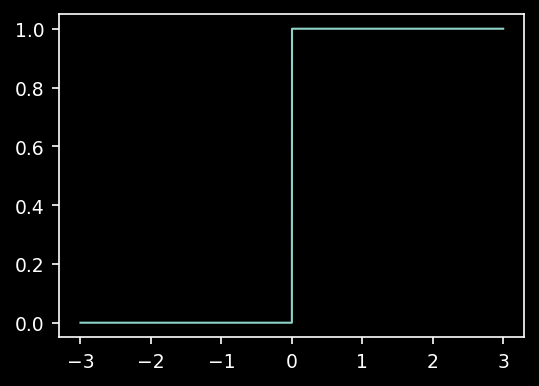

In [6]:
import numpy as np
import matplotlib.pyplot as plt
def binary_step_activate_function(x):
    y = x > 0
    return y.astype(np.int64)
    
x = np.arange(-3, 3, 0.001)
y = binary_step_activate_function(x)

plt.plot(x,y)
plt.show()

한계: 0 또는 1만 표현 가능

### Linear function
$$f(x) = ax$$

임의의 값을 출력할 수 있음  

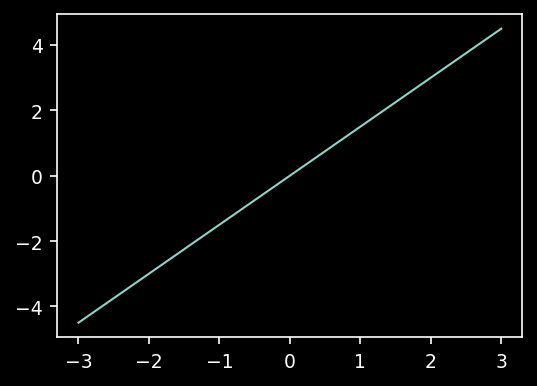

In [7]:
plt.plot(x, 1.5*x)
plt.show()

한계:
- 출력 정규화가 안됨
- 미분값이 상수라 backpropagation을 못함  


### Non-linear function
활성화 함수한테 기대하는 거:
- 출력값의 정규화
- backpropagation 할 수 있게 생기기

**비선형 활성화 함수**는 이런 걸 할수 있음  
이것도 여러 개가 존재함

#### 1. $\sigma(x)$ (Sigmoid function)
$$\sigma(x)=\dfrac{1}{1+\exp(-x)}$$

In [8]:
## 그림 사이즈 바꾸기
plt.rcParams.update({
    "figure.figsize": (5,2.4), # figure size (inch)
})

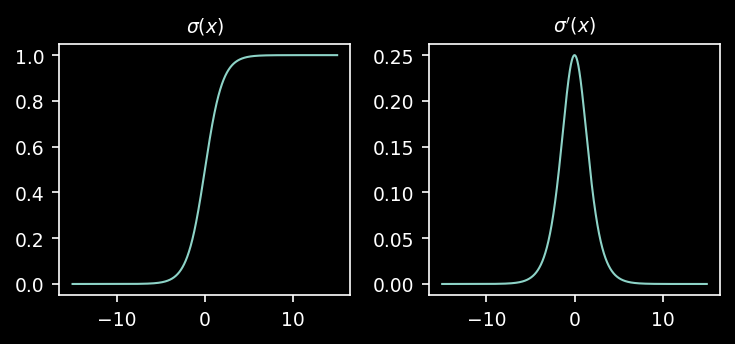

In [9]:
def sig(x):
    h = 1/(1+np.e**(-x))
    return h

def d_sig(x):
    h = sig(x) * (1-sig(x))
    return h

x = np.arange(-15,15,0.01)

fig,ax = plt.subplots(1,2)
ax[0].plot(x, sig(x))
ax[0].set_title(r"$\sigma(x)$")
ax[1].plot(x, d_sig(x))
ax[1].set_title(r"$\sigma'(x)$")
fig.tight_layout()

장점:
- 미분 불가능한 지점 없음
- 출력값이 0 ~ 1 사이로 제한
  - exploding gradient 방지

분류 문제나 비용 함수에 많이 사용

단점:
- 미분값의 범위가 0 ~ 0.25 > 레이어 늘어나면 손실의 gradient가 0이 되는 vanishing gradient 발생 가능
- 출력값이 항상 양수 > 학습이 느려지는 원인이라고 함

#### 2. tanh (Hyperbolic tangent function)
$$\tanh(x) = 2\sigma(2x)-1 = \dfrac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$$

$$\tanh'(x) = 1-\tanh^2(x)$$

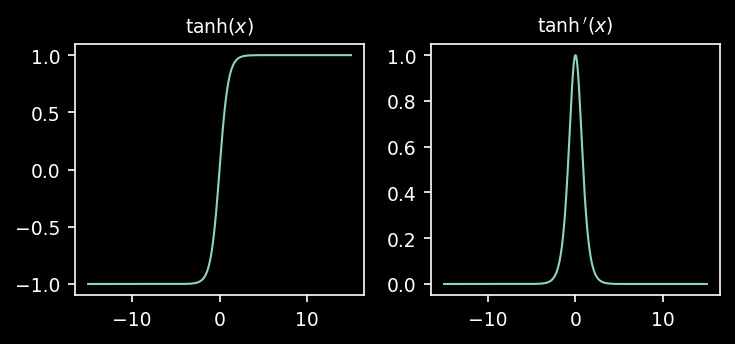

In [10]:
def tanh(x):
    y = 2*sig(2*x)-1
    return y

def d_tanh(x):
    y = 1-tanh(x)**2
    return y

fig,ax = plt.subplots(1,2)
ax[0].plot(x, tanh(x))
ax[0].set_title(r"$\tanh(x)$")
ax[1].plot(x, d_tanh(x))
ax[1].set_title(r"$\tanh'(x)$")
fig.tight_layout()

장점:
- 출력값이 -1 ~ 1 사이로 제한
  - sigmoid 함수에서 학습 느려지는 문제 해결

단점:
- 미분값의 범위가 0 ~ 1 > vanishing gradient는 여전히 남아있음

#### 3. ReLU (Rectified Linear Unit)
$$f(x) = \max{(0,x)}$$

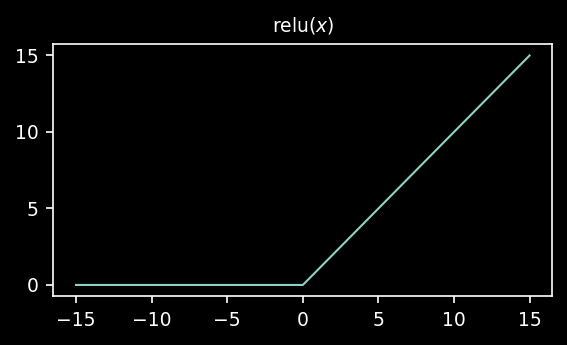

In [11]:
plt.rcParams.update({
    "figure.figsize": (4,2.4),
})

def relu(x):
    return np.maximum(x, 0)

fig, ax = plt.subplots()
ax.plot(x, relu(x))
ax.set_title(r"relu$(x)$")
fig.tight_layout()

장점:
- vanishing gradient 문제 해결
- 빠른 학습
- 낮은 연산 비용 (0보다 큰 구간의 미분값 = 1)

단점:
- x < 0 이면 기울기 = 0 > 해당 뉴런이 더 이상 업데이트 되지 않음

### ReLU 보완

#### 4. Leaky ReLU
음수 영역에서 기울기를 약간 남김

$$f(x)=\max(\alpha x, x)$$

$\sigma$ 는 보통 0.01

장점: 낮은 계산 비용, ReLU와 비슷한 성질

#### 5. ELU
음수 구간을 지수 형태로 연결

$$f(x) = \begin{cases} \alpha (e^{x}-1), & x \le 0 \\ 1, & x > 0 \end{cases}$$

장점: 안정적인 학습  
단점: 지수 연산 때문에 계산 비용 증가

#### 6. GELU (Gaussian Error Linear Unit)
입력이 정규분포를 따른다는 가정하에 입력이 활성화될 확률을 반영한 함수

$$\mathrm{GELU}(x)\approx 0.5x\left(1+\tanh\left(\sqrt{\frac{2}{\pi}}\left(x+0.044715x^3\right)\right)\right)$$

ReLU, ELU 등 다른 활성화 함수보다 학습 성능이 좋다고 알려져있음

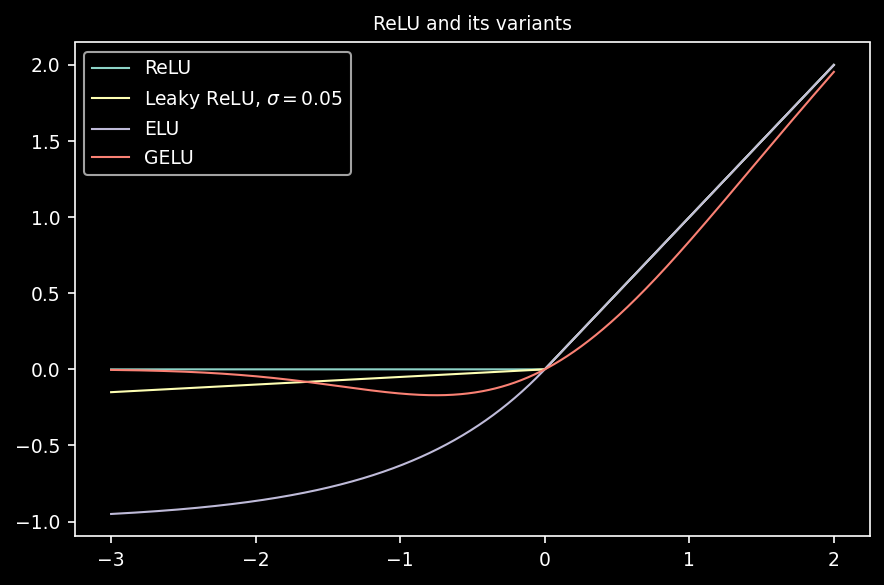

In [12]:
def leaky_relu(x, alpha=0.05):
    return np.maximum(alpha * x, x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def gelu(x):
    return 0.5 * x * (1 + np.tanh(
        np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)
    ))

x = np.linspace(-3, 2, 1000)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, relu(x), label="ReLU")
ax.plot(x, leaky_relu(x), label=r"Leaky ReLU, $\sigma=0.05$")
ax.plot(x, elu(x), label="ELU")
ax.plot(x, gelu(x), label="GELU")
ax.legend()
ax.set_title("ReLU and its variants")
fig.tight_layout()

# PyTorch

---

In [13]:
import torch

A = torch.tensor([[1, 2], [3, 4]])
B = torch.tensor([[5, 6], [7, 8]])

# 행렬 곱 (Dot product)
print(A @ B) 

tensor([[19, 22],
        [43, 50]])


# UV
파이썬 가상환경 만들어주는 도구

[uv docs](https://docs.astral.sh/uv/)

## 설치 방법
### Windows
PowerShell 열고

In [14]:
powershell -ExecutionPolicy ByPass -c "irm https://astral.sh/uv/install.ps1 | iex"

SyntaxError: invalid syntax (3013804036.py, line 1)

### macOS, linux
터미널 열고

In [ ]:
curl -LsSf https://astral.sh/uv/install.sh | sh 

## 이후 과정

In [ ]:
# 파이썬 설치
uv python install 3.13

# 작업 디렉토리로 이동
# cd ~~~

# 가상환경 생성
uv venv --python 3.13
# 현재 경로에 .venv 라는 폴더 생성됨

# 가상환경 활성화
# Windows
# .venv\Scripts\activate

# macOS
source .venv/bin/activate

### 패키지 설치

In [ ]:
uv pip install numpy scikit-learn matplotlib torch # ...

## VS Code
코드 에디터

[VS Code](https://code.visualstudio.com/)